In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import scipy
from scipy.stats import spearmanr

In [49]:
data = pd.read_csv("SampledData.csv")

In [50]:
train, test = train_test_split(data, test_size = 0.5)
features = list(data.columns[3:34])
X = data[features]
y =data['Target']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=10)
logmodel.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
pred = logmodel.predict(X_test)

In [53]:
from sklearn import metrics

In [54]:
model_accuracy = metrics.accuracy_score(y_test,pred)
#area_under_curve = metrics.auc(X_test,y_test)
print('Accuracy of Model is : ',model_accuracy)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy of Model is :  0.8725
[[189  11]
 [ 40 160]]
             precision    recall  f1-score   support

    Genuine       0.83      0.94      0.88       200
   Imposter       0.94      0.80      0.86       200

avg / total       0.88      0.87      0.87       400



In [55]:
df = pd.DataFrame(y_test)
se = pd.Series(pred)
df['Predictions'] = se.values

In [56]:
tempdf = pd.DataFrame(logmodel.predict_proba(X_test))
se1 = pd.Series(tempdf[0])
ew = se1.round(decimals=3)
df['Genuine probability'] = ew.values
se2 = pd.Series(tempdf[1])
ew1 = se2.round(decimals=3)
df['Imposter probability'] = ew1.values


In [57]:
df

,Target,Predictions,Genuine probability,Imposter probability
1,Genuine,Genuine,0.758,0.242
389,Genuine,Genuine,0.659,0.341
769,Imposter,Imposter,0.331,0.669
413,Imposter,Genuine,0.913,0.087
675,Imposter,Imposter,0.464,0.536
345,Genuine,Genuine,0.780,0.220
685,Imposter,Imposter,0.122,0.878
229,Genuine,Genuine,0.783,0.217
22,Genuine,Genuine,0.878,0.122
529,Imposter,Imposter,0.438,0.562


In [58]:
logmodel.coef_

array([[-4.30343663,  1.54936267,  5.8527993 ,  0.39181648,  1.74399508,
         1.3521786 ,  3.8986239 ,  2.56177378, -1.33685012,  0.81089148,
        -1.64283357, -2.45372504, -5.00644252, -4.77647205,  0.22997047,
        -5.04172367,  0.63171932,  5.67344299, -1.8690765 , -2.60052256,
        -0.73144606, -3.95668754, -0.58326736,  3.37342018,  0.94181108,
        -4.00347839, -4.94528947,  1.84861394,  3.95900549,  2.11039155,
         3.83298965]])

In [59]:
logmodel.intercept_

array([2.48420041])

In [60]:
error_rate = []

# Will take some time
for i in range(1,100):
    train, test = train_test_split(data, test_size = 0.5, random_state=i)
    features = list(data.columns[3:34])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']    
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)

    error_rate.append(np.mean(pred != y_test))

[1, 100, 0.1, 0.2]

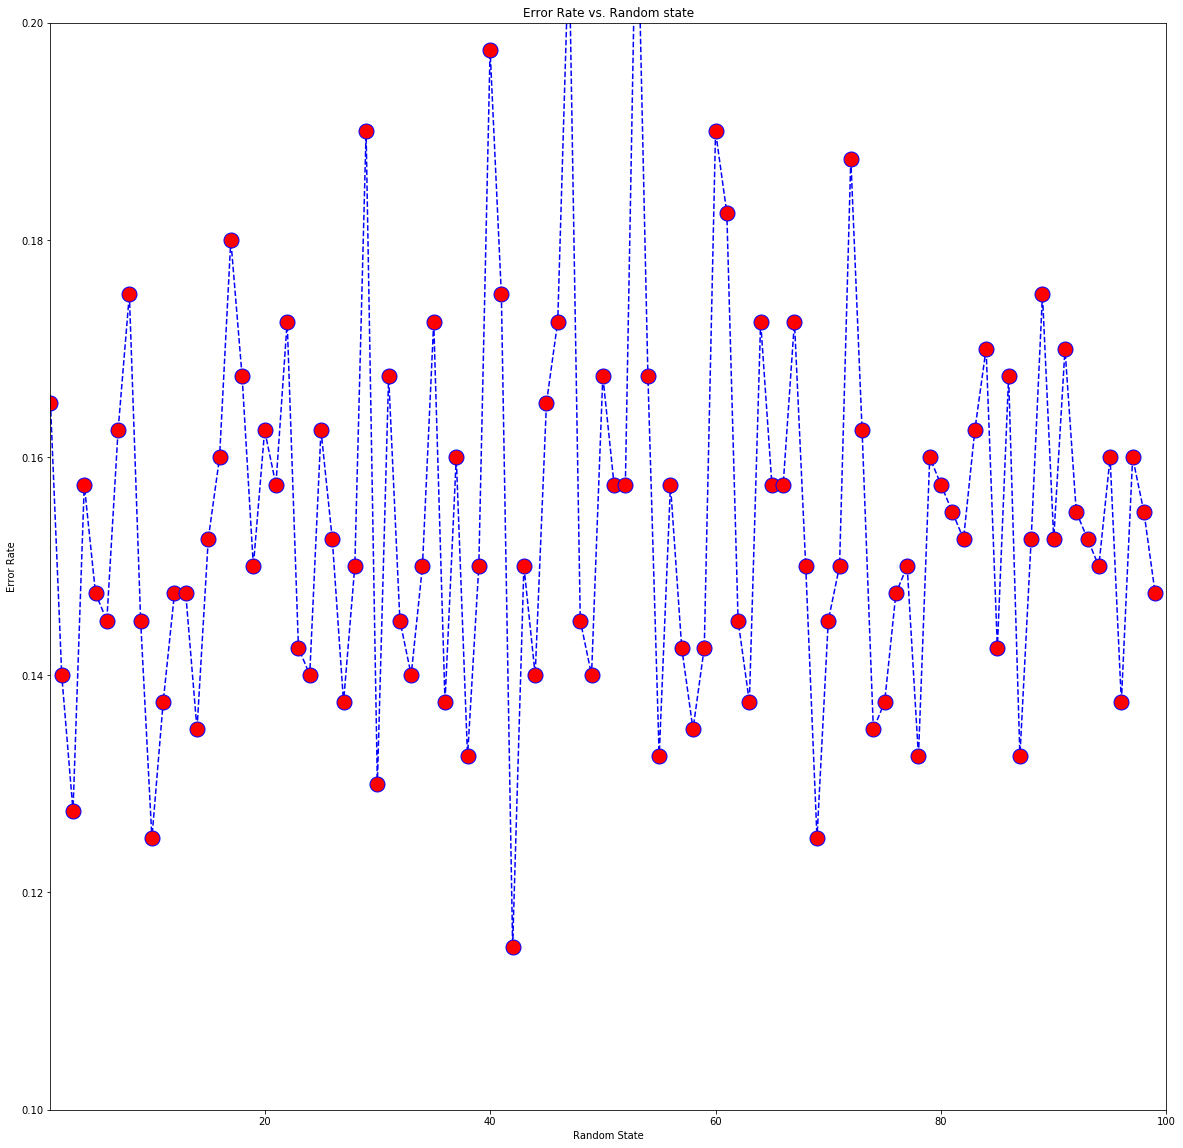

In [61]:
ax =plt.figure(figsize=(20,20))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Error Rate vs. Random state')
plt.xlabel('Random State')
plt.ylabel('Error Rate')
plt.axis([1,100,0.1,.20])

In [62]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000]
accuracy = []

for i in C_param_range:
      
    train, test = train_test_split(data, test_size = 0.4,random_state = 88)
    features = list(data.columns[3:34])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression(C=i)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)



Text(0,0.5,'Accuracy')

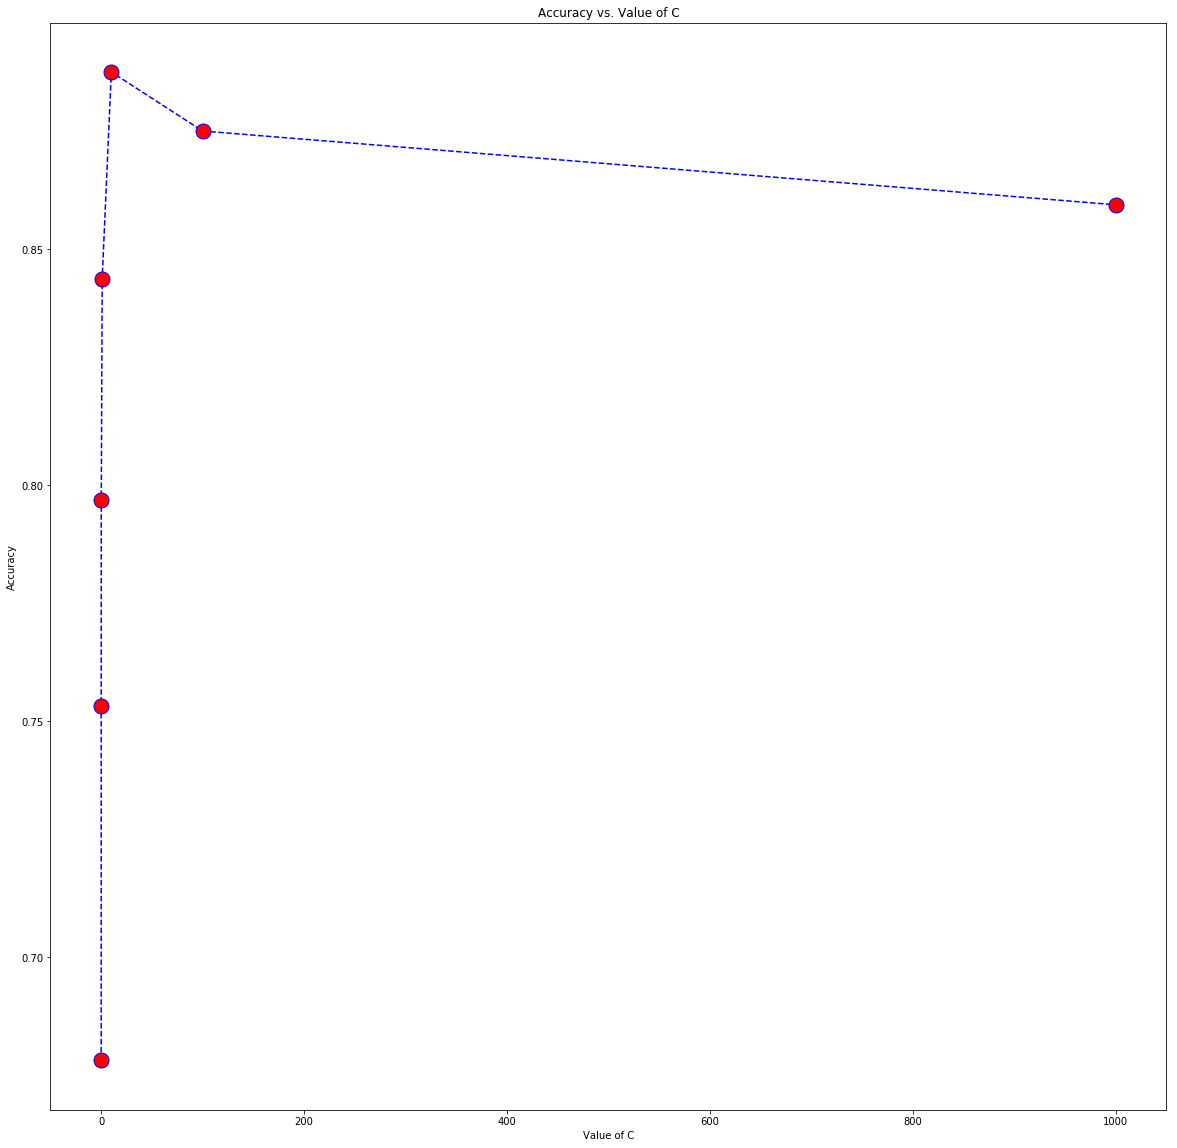

In [63]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_param_range,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. Value of C')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')

In [64]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:
      
    train, test = train_test_split(data, test_size = i,random_state = 68)
    features = list(data.columns[3:34])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression(C=100)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)



Text(0,0.5,'Accuracy')

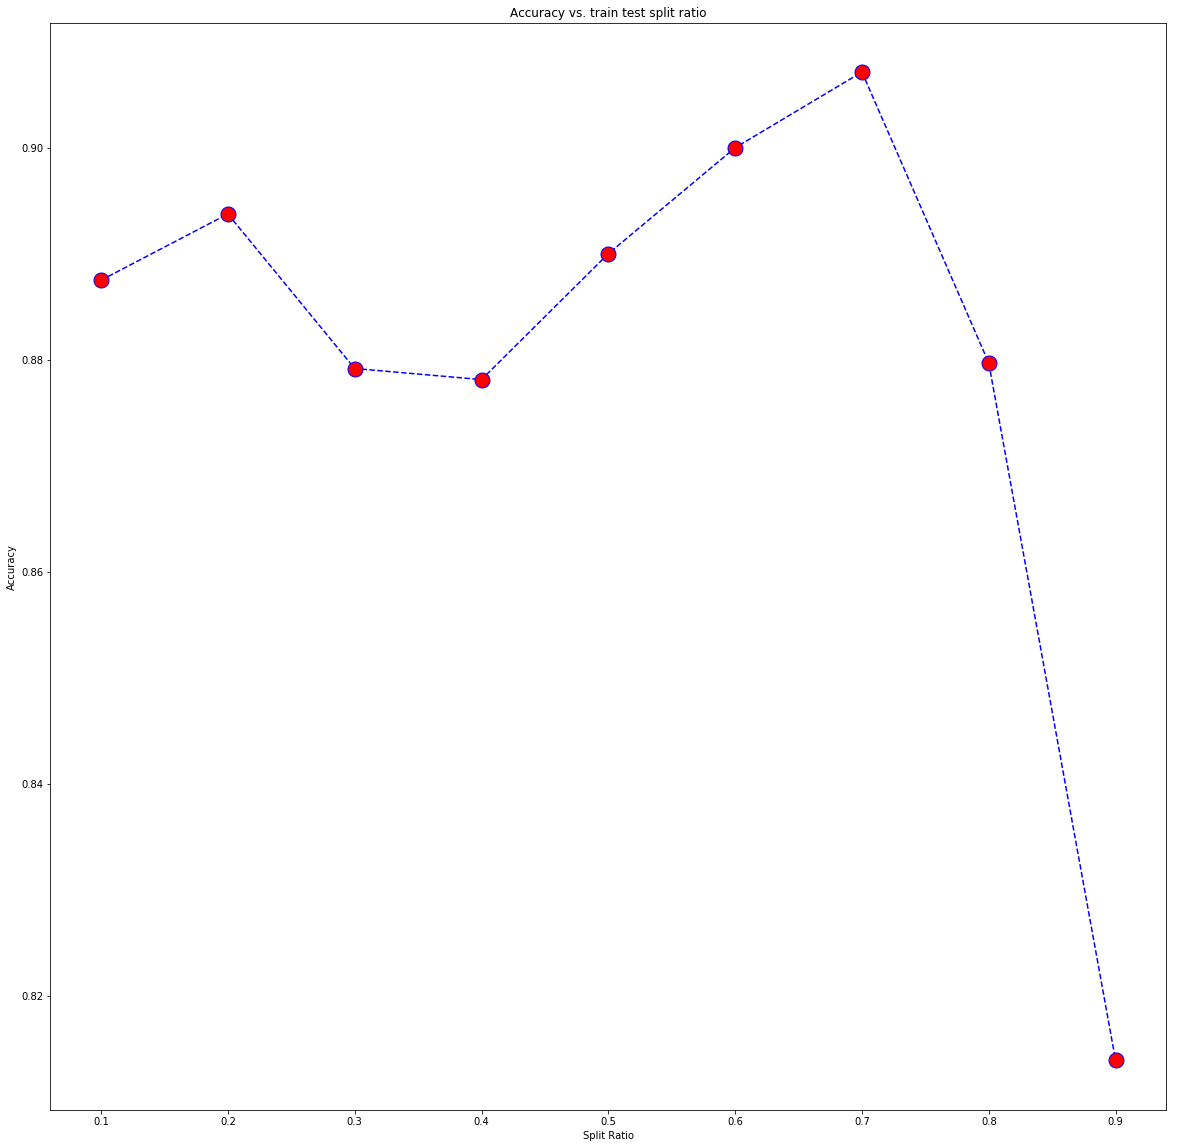

In [65]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')


In [66]:
datanew = pd.read_csv("250Ge250IM.csv")

In [67]:
train, test = train_test_split(datanew, test_size = 0.4,random_state = 68)
features = list(datanew.columns[3:34])
X = datanew[features]
y =datanew['Target']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']
logmodel = LogisticRegression(C=100)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
model_accuracy = metrics.accuracy_score(y_test,pred)
   

In [68]:
model_accuracy

0.89

In [69]:
pred_validate = logmodel.predict(X_validate)

NameError: name 'X_validate' is not defined

In [ ]:
print(confusion_matrix(y_validate,pred_validate))

In [ ]:
print(classification_report(y_validate,pred_validate))

In [ ]:
model_acc = metrics.accuracy_score(y_validate,pred_validate)

In [ ]:
model_acc

In [ ]:
var1 = data['H.period']

In [ ]:
var2 = data['DD.period.t']

In [ ]:
spearmanr_coeff,p_value = spearmanr(var1,var2)

In [ ]:
spearmanr_coeff